<img src="../Images/DSC_Logo.png" style="width: 400px;">

# Temperature Anomalies

![sky](../Images/temperature.jpg)

*Image modified from Gerd Altmann, Pixabay*

This notebook analyzes a dataset of global temperature anomalies for months from 1850 to 2024 against the 1901-2000 average. The data serves as a critical resource for assessing long-term climate trends and variations over time. It is sourced from the NOAA National Centers for Environmental Information. The dataset is used to demonstrate outliers and data gaps in time series, to analyze stationarity, autocorrelation, and patterns in time series and to calculate linear trends.


**Original dataset:** NOAA National Centers for Environmental information: Climate at a Glance: Global Time Series [Data set]. https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series, retrieved on August 23, 2024.

In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) # Suppress specific warnings

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Exercise 1: Time Series Basics**

## 1. Load, Prepare and Plot Time Series Data

**Exercise:** Import the dataset of NOAA global temperature anomalies in **monthly resolution**. The path of the dataset is '../Datasets/NOAA_time_series_monthly.csv'.

In [4]:
path = '../Datasets/NOAA_time_series_monthly.csv' 
global_temp = pd.read_csv(path, skiprows=4, delimiter=',')

**Exercise:** Print the first rows of the dataset to see it's structure.

In [5]:
global_temp.head()

,Date,Anomaly
0,185001,-0.46
1,185002,-0.21
2,185003,-0.22
3,185004,-0.36
4,185005,-0.30


**Exercise:** convert *Date* into a `datetime` object, set the date column as index for easy analysis and and check the datasets' structure after conversion.

In [6]:
global_temp['Date'] = pd.to_datetime(global_temp['Date'].astype(str), format='%Y%m')
global_temp.set_index('Date', inplace=True) # Set the 'Date' column as the index
global_temp.head()

,Anomaly
Date,
1850-01-01,-0.46
1850-02-01,-0.21
1850-03-01,-0.22
1850-04-01,-0.36
1850-05-01,-0.30


**Exercise:** Print summary statistics of the time series.

In [7]:
global_temp.describe()

,Anomaly
count,2096.000000
mean,0.055468
std,0.374475
min,-0.740000
25%,-0.210000
50%,-0.040000
75%,0.222500
max,1.430000


**Exercise:** Plot the time series.

<Axes: xlabel='Date'>

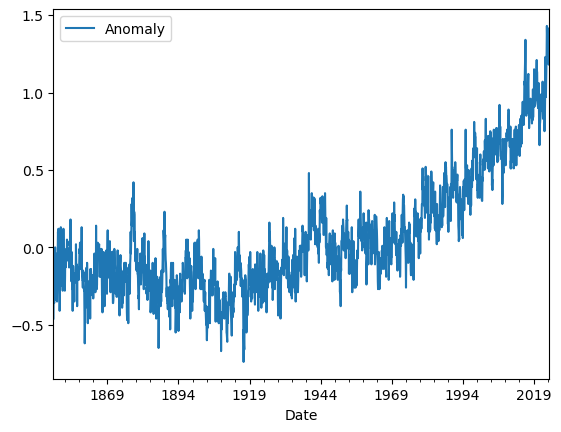

In [8]:
global_temp.plot()

**Exercise:** In addition, create a bar plot showing median monthly anomalies.

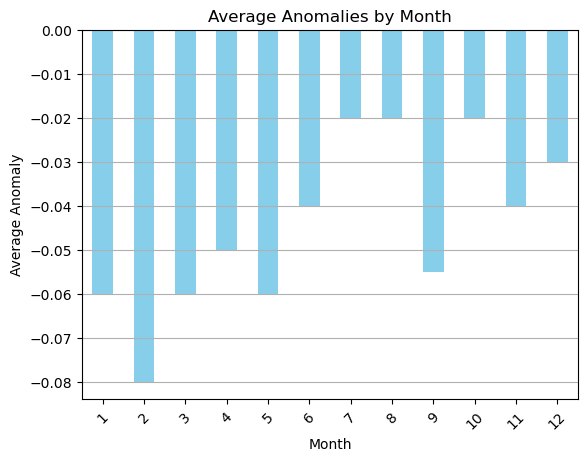

In [9]:
# Add column holding month
global_temp['month'] = global_temp.index.month

# Calculate the average anomaly per month
average_anomalies = global_temp.groupby('month')['Anomaly'].median()

# Create a bar plot using matplotlib
plt.figure()
average_anomalies.plot(kind='bar', color='skyblue')
plt.title('Average Anomalies by Month')
plt.xlabel('Month')
plt.ylabel('Average Anomaly')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## **Exercise 2: Exploration of Time Series Features**

## 2. Time Series Decomposition and Evaluation

Investigating the time series features of global temperature anomalies is essential for understanding the Earth's climate dynamics. Analyzing trends allows us to identify long-term warming patterns. Examining seasonal patterns helps differentiate natural climatic variations from anthropogenic influences. Additionally, studying the residuals, or the remaining values after removing trends and seasonality, helps uncover and study any anomalies or outliers.

**Exercise:** Decompose the time series into the components trend, seasonal, and residual using an additive model from the `statsmodels` library. Are the patterns as you expected?

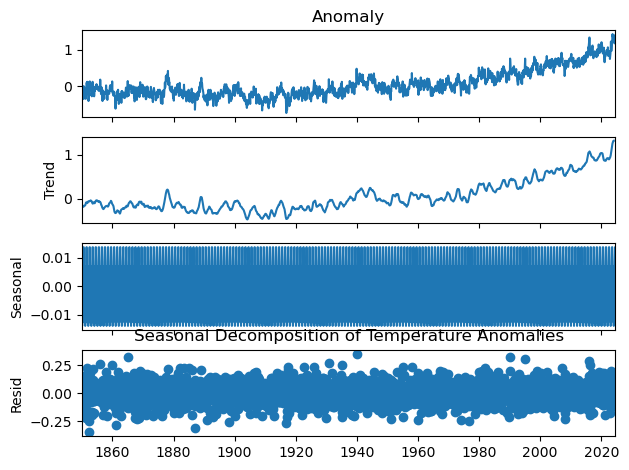

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

temp_decompose = seasonal_decompose(global_temp['Anomaly'], model='additive')
temp_decompose.plot()
plt.title('Seasonal Decomposition of Temperature Anomalies')
plt.show()

**Exercise:** Does the decomposition effectively captured the underlying structure of the time series, accurately separating the trend and seasonal components from the random fluctuations? Plot the ACF (using the `statsmodels` library) with 48 lags to check for any remaining autocorrelation in the residuals. Eventually test different lag sizes to see the difference in information you gain from the ACF plot. In addition, plot the lag plot from the `pandas` library. 

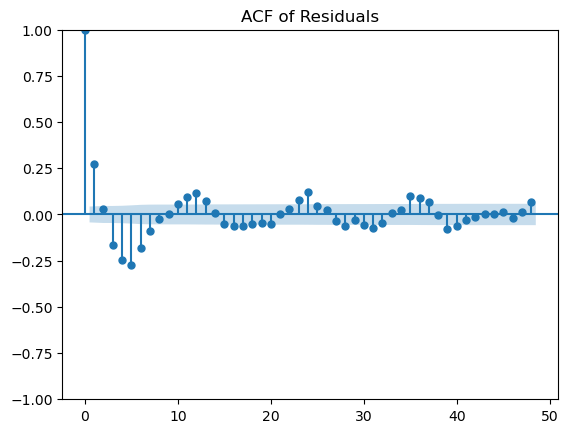

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

# Extract residuals and drop NaN values
temp_resid = temp_decompose.resid.dropna()

# Plot ACF of the residuals for 48 lags
plot_acf(temp_resid, lags=48)
plt.title('ACF of Residuals')
plt.show() 

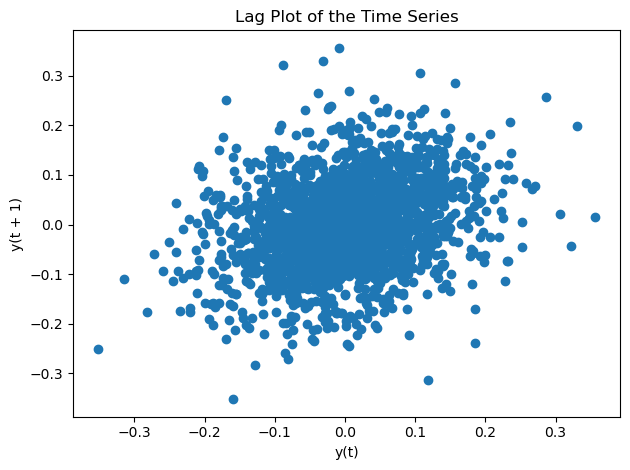

In [12]:
from pandas.plotting import lag_plot

lag_plot(temp_resid)
plt.title('Lag Plot of the Time Series')
plt.tight_layout()
plt.show()

While the ACF plot shows some autocorrelation in the residuals, the random scatter in the lag plot indicates that the residuals are uncorrelated. Additional analysis are needed.

**Exercise:** Conducting a white noise test like the Ljung-Box test would provide additional confidence that the residuals are uncorrelated and the decomposition effectively captured the time series structure. Calculate the Ljung-Box statistics using the `statsmodels` library.

In [13]:
from statsmodels.tsa.stattools import acf

# Calculating ACF, Ljung-Box statistics, and p-values
r, q, p = acf(temp_resid, nlags=35, qstat=True)
print('ACF values:', r) 
print('Ljung-Box statistics:', q)
print('P-values:', p)

ACF values: [ 1.00000000e+00  2.74738181e-01  2.76082816e-02 -1.62690321e-01
 -2.46394734e-01 -2.74954339e-01 -1.83239194e-01 -9.15981776e-02
 -2.51341062e-02  3.99957050e-03  5.92783661e-02  9.32686099e-02
  1.15837935e-01  7.15775500e-02  9.55426798e-03 -5.15803325e-02
 -6.11265166e-02 -6.32796614e-02 -5.18127608e-02 -4.42148439e-02
 -5.25196566e-02  7.77398958e-04  2.87597862e-02  7.81230045e-02
  1.23387742e-01  4.66463381e-02  2.53468424e-02 -3.49690627e-02
 -6.18836185e-02 -3.09164541e-02 -5.62300715e-02 -7.38257664e-02
 -4.83806285e-02  7.66134824e-03  2.36079089e-02  9.84828694e-02]
Ljung-Box statistics: [157.52909774 159.12061021 214.4127468  341.29811011 499.37874994
 569.62177717 587.18277497 588.50562789 588.53914146 595.90453091
 614.14700443 642.29995248 653.05433744 653.24604379 658.8361467
 666.69068711 675.11238845 680.76117506 684.87672765 690.68632564
 690.68759914 692.43139107 705.30475069 737.43313073 742.02712854
 743.38423644 745.968553   754.06585447 756.0878470

The Ljung-Box test does not support the hypothesis that the residuals are white noise. Instead, it indicates that the decomposition could be improved, as the residuals still exhibit autocorrelation. Although the ACF plot shows mostly small autocorrelations beyond lag 1, the Ljung-Box test's extremely small p-values provide strong statistical evidence that some structure or correlation remains in the residuals.

**Exercise:** Further assess the stationarity of residuals for validating the decomposition process by examining their rolling mean and standard deviation. Use a rolling window size of 12 months. The choice of a 12-month window allows for capturing annual trends and seasonal variations. Plot these statistics alongside the residuals to evaluate their stationarity visually.

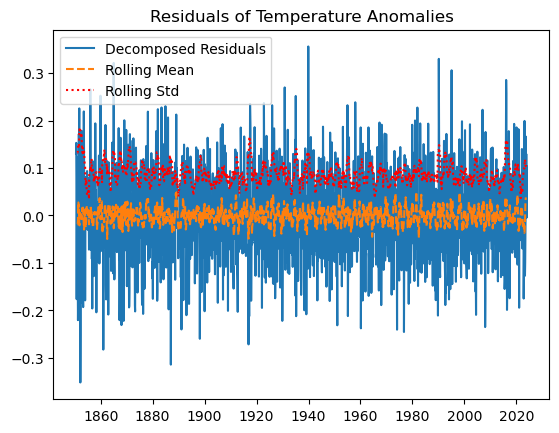

In [14]:
# Rolling mean and standard deviation of the residuals
rolm = temp_resid.rolling(window=12, center=True).mean()
rolstd = temp_resid.rolling(window=12, center=True).std()

# Plot residuals, rolling mean, and rolling std
plt.plot(temp_resid, label='Decomposed Residuals')
plt.plot(rolm, label='Rolling Mean', linestyle='--')
plt.plot(rolstd, label='Rolling Std', linestyle=':', c='red')
plt.title('Residuals of Temperature Anomalies')
plt.legend()
plt.show()

The residuals appear mostly stationary based on the rolling mean and standard deviation.

**Exercise:** Explore seasonality using the `month_plot` from the `statsmodels` library. This plot can be used to check for any recurring patterns or trends across different months over several years.

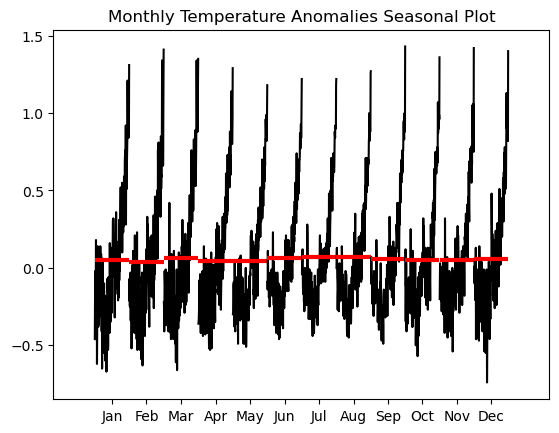

In [15]:
from statsmodels.graphics.tsaplots import month_plot

# Generate seasonal plots
month_plot(global_temp['Anomaly'])
plt.title('Monthly Temperature Anomalies Seasonal Plot')
plt.show()

## **Exercise 3: Time Series Model ARIMA**

## 3. Investigate the Time Series for Stationarity and Differencing

**Exercise:** Do you expect that the temperature anomaly time series is stationary? Calculate the `kpss` statistics to test it.

In [16]:
from statsmodels.tsa.stattools import kpss

# KPSS test for stationarity
kpss_stat, p_value, lags, crit_values = kpss(global_temp['Anomaly'], regression='c', nlags='auto')

# Output the results of the KPSS test
print(f'KPSS Statistic: {kpss_stat}')
print(f'p-value: {p_value}')
print(f'Lags: {lags}')
print('Critical Values:', crit_values)
if p_value < 0.05:
    print("The series is likely non-stationary.")
else:
    print("The series is likely stationary.")

KPSS Statistic: 5.303529068527815
p-value: 0.01
Lags: 28
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is likely non-stationary.


C:\Users\annika\AppData\Local\Temp\ipykernel_12344\3225542127.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, crit_values = kpss(global_temp['Anomaly'], regression='c', nlags='auto')


The small p-value indicates that the global temperature anomalies time series is likely non-stationary. Therefore, applying stationary time series models requires differencing the time series first.

**Exercise:** Conduct differencing the time series with a lag of 1 and plot the resulting time series.

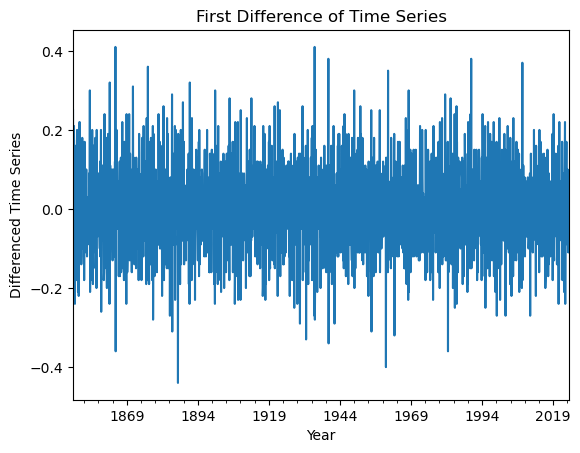

In [17]:
global_temp_diff = global_temp['Anomaly'].diff(1).dropna()

# Plot the differenced series
global_temp_diff.plot()
plt.title('First Difference of Time Series')
plt.xlabel('Year')
plt.ylabel('Differenced Time Series')
plt.show()

**Exercise:** Plot the ACF and PACF plots of the differenced time series and calculate the KPSS statistics to check again for stationarity.

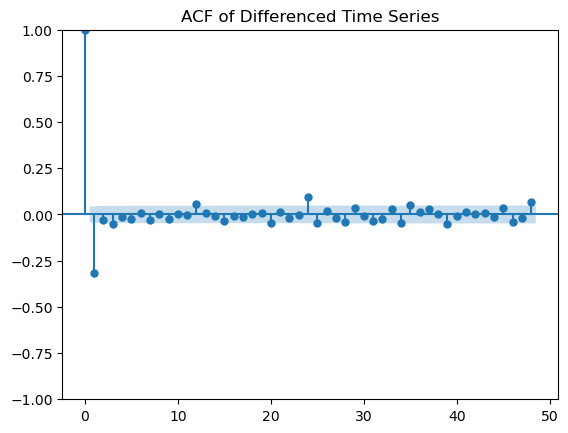

KPSS Statistic: 0.14231953158230787
p-value: 0.1
Lags: 69
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is likely stationary.


C:\Users\annika\AppData\Local\Temp\ipykernel_12344\1027820387.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, crit_values = kpss(global_temp_diff, regression='c', nlags='auto')


In [18]:
# Plot ACF using PythonTsa (PACF is not plotted here)
plot_acf(global_temp_diff, lags=48)
plt.title('ACF of Differenced Time Series')
plt.show()

# KPSS test for stationarity
kpss_stat, p_value, lags, crit_values = kpss(global_temp_diff, regression='c', nlags='auto')

# Output the results of the KPSS test
print(f'KPSS Statistic: {kpss_stat}')
print(f'p-value: {p_value}')
print(f'Lags: {lags}')
print('Critical Values:', crit_values)
if p_value < 0.05:
    print("The series is likely non-stationary.")
else:
    print("The series is likely stationary.")

## 4. ARIMA

In [21]:
from statsmodels.tsa.arima.model import ARIMA 

def choose_model(x, max_p, max_q, ctrl=1.03):
    best_aic = np.inf
    best_order = None
    best_mdl = None

    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                if p == 0 and q == 0:
                    continue
                # Use ARIMA model instead of ARMA
                model = ARIMA(x, order=(p, 0, q))
                results = model.fit()
                aic = results.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, q)
                    best_mdl = results
            except Exception as e:
                print(f"Model fitting failed for order ({p},{q}) with error: {e}")
                continue

    print(f"Best ARIMA model order: {best_order} with AIC: {best_aic}")
    return best_mdl

**Exercise:** Use the 'choose_model' function to identify the best ARIMA model for the time series. Explore a range of autoregressive (p) and moving average (q) parameters. Analyze the output to assess the most suitable ARIMA model parameters for the temperature anomalies.

Note: Running the loop to find the best ARIMA model with the temperature anomalies time series can take a considerable amount of time because of it's length. Therefore choose a rather small range of parameters (e.g. 0 to 3).

In [19]:
# Set the frequency of the index to avoid a warning when fitting the model
global_temp_diff.index = global_temp_diff.index.to_period('M').to_timestamp() 

In [22]:
# Call the model selection function
best_model = choose_model(global_temp_diff, max_p=3, max_q=3, ctrl=1.03)

# Display the best model summary
if best_model:
    print(best_model.summary())

C:\Users\annika\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\annika\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


KeyboardInterrupt: 

**Exercise:** Based on your previous model selection process, specify the optimal ARIMA model parameters and utilize the ARIMA function to fit the model to the differenced temperature anomalies, applying the selected parameters.

In [33]:
arma1= ARIMA(global_temp_diff, order=(1,0,2)).fit()
print(arma1.summary())

C:\Users\annika\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                Anomaly   No. Observations:                 2095
Model:                 ARIMA(6, 0, 7)   Log Likelihood                1879.485
Date:                Wed, 30 Oct 2024   AIC                          -3728.971
Time:                        02:23:23   BIC                          -3644.261
Sample:                    02-01-1850   HQIC                         -3697.940
                         - 08-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.646      0.100   -9.81e-05       0.001
ar.L1         -0.3510      1.589     -0.221      0.825      -3.466       2.764
ar.L2         -0.0564      0.910     -0.062      0.9

**Exercise:** Analyze whether the ARIMA model fits the data well. Ideally, we want to see that the residuals resemble white noise, implying that you have captured all systematic patterns in the data. Analyze the residuals from the ARIMA model using with the following: ACF, Lag plot, Ljung-Box statistics, Q-Q plot and normality test.

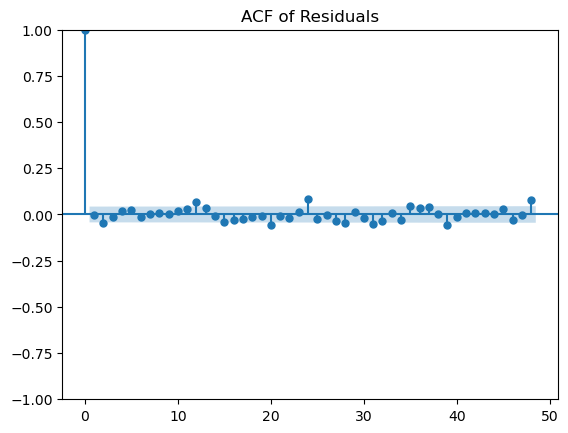

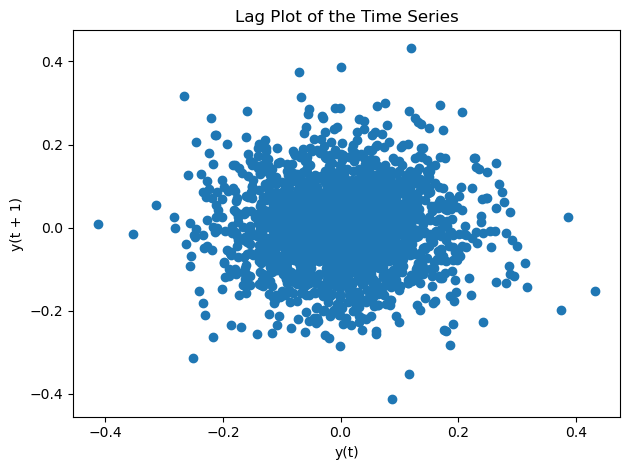

ACF values: [ 1.00000000e+00 -7.78556734e-04 -4.84088818e-02 -1.21079894e-02
  1.63881344e-02  2.26864302e-02 -1.10276524e-02  3.35910135e-03
  7.96156123e-03  5.09608450e-03  1.74630478e-02  3.14763979e-02
  6.97628542e-02  3.74192790e-02 -9.18343093e-03 -4.29094786e-02
 -2.84684640e-02 -2.26009357e-02 -1.39310904e-02 -8.65736167e-03
 -5.61875360e-02 -1.07450138e-02 -2.16154822e-02  1.33628937e-02
  8.48852394e-02 -2.45372534e-02 -1.27782991e-03 -3.77566355e-02
 -4.84346712e-02  1.45820207e-02 -2.03320661e-02 -5.12176205e-02
 -3.42529853e-02  1.01563092e-02 -2.77790369e-02  4.61737704e-02]
Ljung-Box statistics: [1.27170480e-03 4.92011891e+00 5.22798712e+00 5.79225776e+00
 6.87411138e+00 7.12985815e+00 7.15359910e+00 7.28703002e+00
 7.34172424e+00 7.98428837e+00 1.00728861e+01 2.03374775e+01
 2.32920358e+01 2.34700770e+01 2.73589664e+01 2.90715668e+01
 3.01514822e+01 3.05619851e+01 3.07205935e+01 3.74047150e+01
 3.76492762e+01 3.86394536e+01 3.90180651e+01 5.43031098e+01
 5.55809131e+0

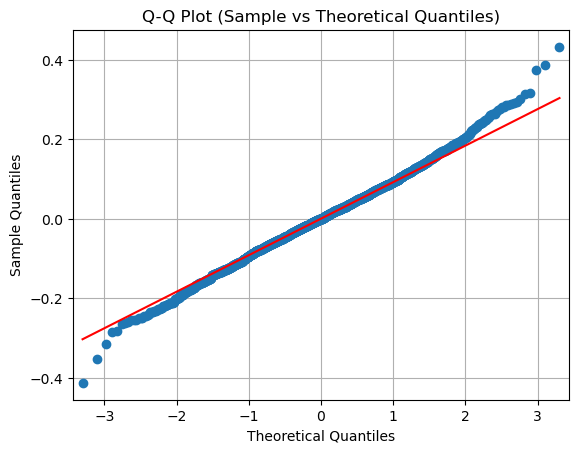

In [34]:
resid1 = arma1.resid

# Plot ACF of the residuals for 48 lags
plot_acf(resid1, lags=48)
plt.title('ACF of Residuals')
plt.show()

# Lag plot of residuals
lag_plot(resid1)
plt.title('Lag Plot of the Time Series')
plt.tight_layout()
plt.show()

# Calculating ACF, Ljung-Box statistics, and p-values
r, q, p = acf(resid1, nlags=35, qstat=True)
print('ACF values:', r) 
print('Ljung-Box statistics:', q)
print('P-values:', p)

# Q-Q plot
import statsmodels.api as sm
plt.figure()
sm.qqplot(resid1, line='q', ax=plt.gca())
plt.title('Q-Q Plot (Sample vs Theoretical Quantiles)')
plt.grid()

from scipy import stats 
normaltest_result = stats.normaltest(resid1)
print("Normality test result:", normaltest_result)

While the lack of significant autocorrelation at most lags and a scattered lag plot are positive signs, the normality of residuals is rejected. Let's see how the prediction would look like...

**Exercise:** Use the fitted ARMA model to predict temperature anomalies for the period from January 2000 to December 2030 to get a feeling for the workflow.

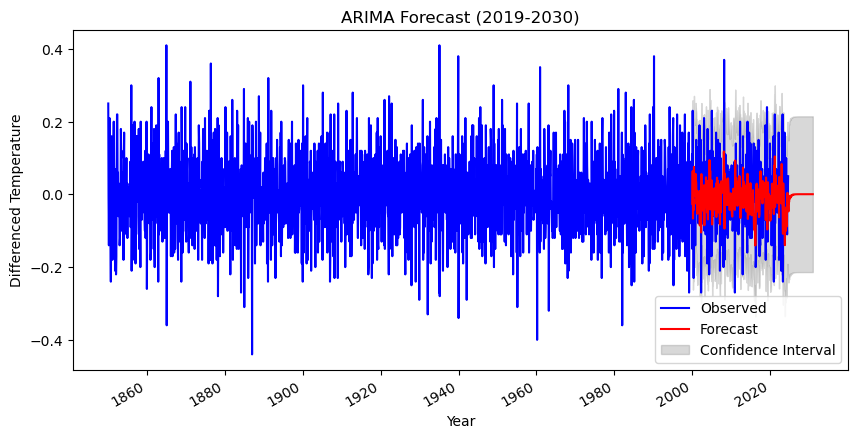

In [35]:
# Generate prediction results
pred = arma1.get_prediction(start='2000-01', end='2030-12')

# Extract predicted mean and confidence intervals
predicts = pred.predicted_mean
predconf = pred.conf_int()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(global_temp_diff, label='Observed', color='blue')
predicts.plot(label='Forecast', color='red')
plt.fill_between(predicts.index,
                 predconf.iloc[:, 0],
                 predconf.iloc[:, 1], color='gray', alpha=0.3, label='Confidence Interval')
plt.title('ARIMA Forecast (2019-2030)')
plt.xlabel('Year')
plt.ylabel('Differenced Temperature')
plt.legend()
plt.show()

The flat red line in the forecast indicates that the ARIMA model is unable to capture variability in the differenced time series. This lack of variability in the forecast is not satisfactory, as it implies that the model may be too simplistic, potentially due to insufficient AR or MA parameterization or inadequate representation of the underlying data structure. Such results suggest that a more complex model or different modeling approach may be necessary for better capturing the dynamics of the time series.